In [1]:
import matplotlib.pyplot as plt
from mu2e.src.fiteval_c import FitFunctionMaker
from mu2e.tools.fiteval import get_mag_field_function
from mu2e.datafileprod import DataFileMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
from mpl_toolkits.mplot3d import Axes3D

In [2]:
ffm= FitFunctionMaker("../mu2e/src/param_825.csv")
mag_field_function = get_mag_field_function('Mau10_825mm_v1')
df = DataFileMaker('../datafiles/Mau10/Standard_Maps/Mu2e_DSMap',use_pickle = True).data_frame

In [3]:
out = ffm.mag_field_function(0,600,7021,True)
print out[0], out[1], out[2]
out = mag_field_function(0,600,7021,True)
print out[0], out[1], out[2]
print df.query('X==0 and Y==600 and Z==7021')[['Bx','By','Bz']]
print
out = ffm.mag_field_function(600,0,7021,True)
print out[0], out[1], out[2]
out = mag_field_function(600,0,7021,True)
print out[0], out[1], out[2]
print df.query('X==600 and Y==0 and Z==7021')[['Bx','By','Bz']]
#out = ffm.mag_field_function(200,100,6500,True)
#print out[0], out[1], out[2]
#out = mag_field_function(200,100,6500,True)
#print out[0], out[1], out[2]


-0.000453272703704 0.0417202856594 1.17323791751
-0.000453272703704 0.0417202856594 1.17323791751
               Bx        By        Bz
2463446 -0.000452  0.041721  1.173238

0.0406836944253 2.31268678007e-08 1.17139555302
0.0406836944253 2.31268678007e-08 1.17139555302
               Bx   By        Bz
3663830  0.040682  0.0  1.171395


Using the field fitting function, generate a set of Bz values for a 1D section in the Z direction.

In [4]:
def bz_func(x,y,z):
    return ffm.mag_field_function(x,y,z,True)[2]
vbz_func = np.vectorize(bz_func,excluded=['x','y'])

def by_func(x,y,z):
    return ffm.mag_field_function(x,y,z,True)[1]
vby_func = np.vectorize(by_func,excluded=['x','z'])

def bx_func(x,y,z):
    return ffm.mag_field_function(x,y,z,True)[0]
vbx_func = np.vectorize(bx_func,excluded=['y','z'])


In [5]:
zs_1 = np.linspace(7900,8000,101)
zs_2 = np.linspace(6800,7200,401)
zs_3 = np.linspace(9800,10300,501)
zs_4 = np.linspace(5300,5400,101)

xs = ys  = np.linspace(100,300,301)

In [6]:
bzs_1 = vbz_func(x = 0, y = 0, z = zs_1)
bzs_2 = vbz_func(x = 0, y = 600, z = zs_2)
bzs_3 = vbz_func(x = 0, y = 0, z = zs_3)
bzs_4 = vbz_func(x = 0, y = 0, z = zs_4)

bxs = vbx_func(x=xs, y=100, z=6500)
bys = vby_func(x=100, y=ys, z=6500)

In [7]:
mu2e_plot3d(df, 'Y', 'Z', 'Bz', 'X==0 and -800<=Y<=800 and 5000<Z<13000', mode='plotly_nb')

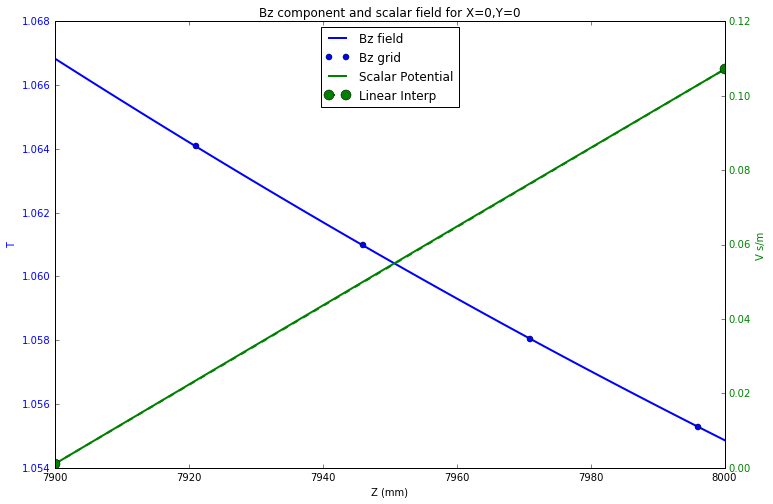

In [8]:
z_grid = zs_1[np.where((zs_1-21)%25==0)]
z_grid_i = np.in1d(zs_1,z_grid)
bz_grid = bzs_1[z_grid_i]
fig, ax1 = plt.subplots()
p1 = ax1.plot(zs_1,bzs_1,'b-',linewidth=2,label='Bz field')
p1_a = ax1.plot(z_grid,bz_grid,'bo',label='Bz grid')
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
scalar = np.cumsum(bzs_1)/1000
p2 = ax2.plot(zs_1,scalar,'g-',linewidth=2,label='Scalar Potential')
p2_a = ax2.plot([zs_1[0],zs_1[-1]],[scalar[0],scalar[-1]],'g--o',linewidth=2,markersize=10,label='Linear Interp')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bz component and scalar field for X=0,Y=0')
lns = p1+p1_a+p2+p2_a
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=9)


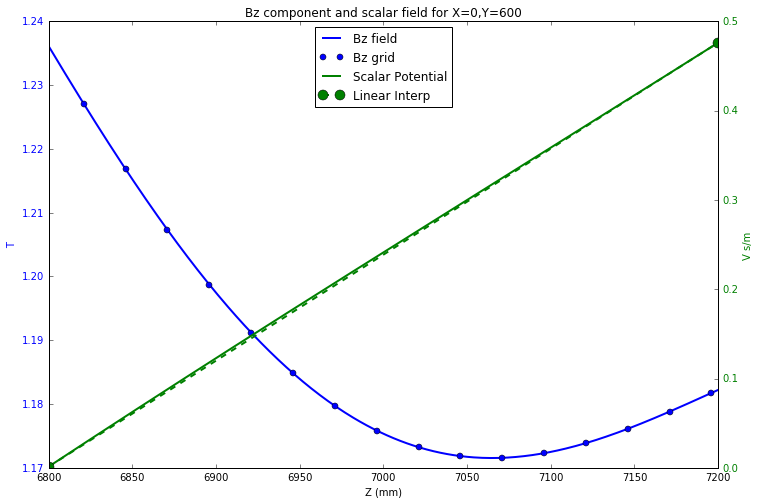

In [9]:
z_grid = zs_2[np.where((zs_2-21)%25==0)]
z_grid_i = np.in1d(zs_2,z_grid)
bz_grid = bzs_2[z_grid_i]
fig, ax1 = plt.subplots()
p1 = ax1.plot(zs_2,bzs_2,'b-',linewidth=2,label='Bz field')
p1_a = ax1.plot(z_grid,bz_grid,'bo',label='Bz grid')
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
scalar = np.cumsum(bzs_2)/1000
p2 = ax2.plot(zs_2,scalar,'g-',linewidth=2,label='Scalar Potential')
p2_a = ax2.plot([zs_2[0],zs_2[-1]],[scalar[0],scalar[-1]],'g--o',linewidth=2,markersize=10,label='Linear Interp')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bz component and scalar field for X=0,Y=600')
lns = p1+p1_a+p2+p2_a
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=9)

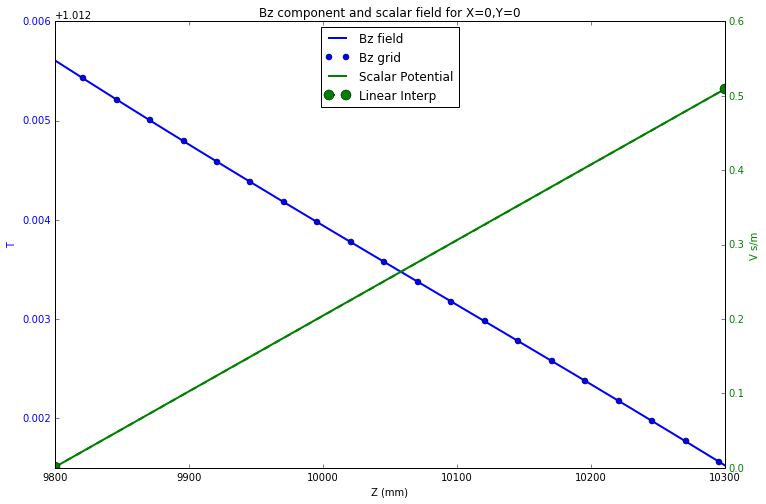

In [10]:
z_grid = zs_3[np.where((zs_3-21)%25==0)]
z_grid_i = np.in1d(zs_3,z_grid)
bz_grid = bzs_3[z_grid_i]
fig, ax1 = plt.subplots()
p1 = ax1.plot(zs_3,bzs_3,'b-',linewidth=2,label='Bz field')
p1_a = ax1.plot(z_grid,bz_grid,'bo',label='Bz grid')
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
scalar = np.cumsum(bzs_3)/1000
p2 = ax2.plot(zs_3,scalar,'g-',linewidth=2,label='Scalar Potential')
p2_a = ax2.plot([zs_3[0],zs_3[-1]],[scalar[0],scalar[-1]],'g--o',linewidth=2,markersize=10,label='Linear Interp')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bz component and scalar field for X=0,Y=0')
lns = p1+p1_a+p2+p2_a
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=9)

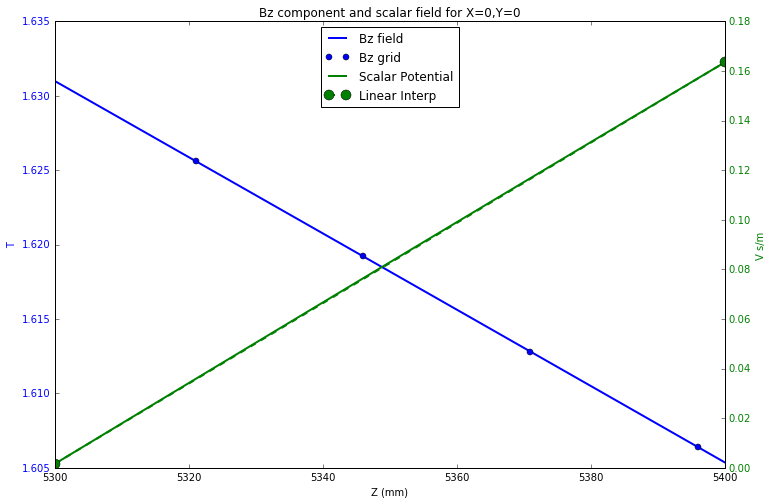

In [11]:
z_grid = zs_4[np.where((zs_4-21)%25==0)]
z_grid_i = np.in1d(zs_4,z_grid)
bz_grid = bzs_4[z_grid_i]
fig, ax1 = plt.subplots()
p1 = ax1.plot(zs_4,bzs_4,'b-',linewidth=2,label='Bz field')
p1_a = ax1.plot(z_grid,bz_grid,'bo',label='Bz grid')
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
scalar = np.cumsum(bzs_4)/1000
p2 = ax2.plot(zs_4,scalar,'g-',linewidth=2,label='Scalar Potential')
p2_a = ax2.plot([zs_4[0],zs_4[-1]],[scalar[0],scalar[-1]],'g--o',linewidth=2,markersize=10,label='Linear Interp')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bz component and scalar field for X=0,Y=0')
lns = p1+p1_a+p2+p2_a
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=9)

In [60]:
mu2e_plot3d(df, 'X', 'Y', 'Bx', 'R<=800 and Z==6521', mode='plotly_nb')

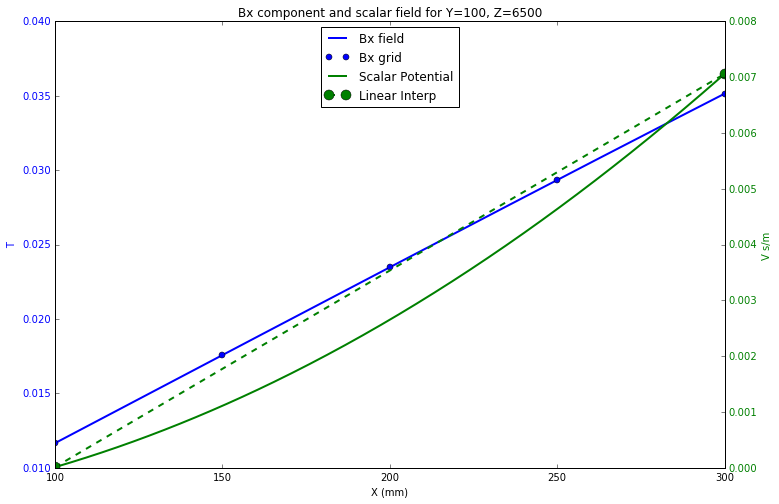

In [13]:
x_grid = xs[np.where((xs)%25==0)]
x_grid_i = np.in1d(xs,x_grid)
bx_grid = bxs[x_grid_i]
fig, ax1 = plt.subplots()
p1 = ax1.plot(xs,bxs,'b-',linewidth=2,label='Bx field')
p1_a = ax1.plot(x_grid,bx_grid,'bo',label='Bx grid')
ax1.set_xlabel('X (mm)')
ax1.set_ylabel('T', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
scalar=np.cumsum(bxs)/1000
p2 = ax2.plot(xs,scalar,'g-',linewidth=2,label='Scalar Potential')
p2_a = ax2.plot([xs[0],xs[-1]],[scalar[0],scalar[-1]],'g--o',linewidth=2,markersize=10,label='Linear Interp')
ax2.set_ylabel('V s/m', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')
plt.title('Bx component and scalar field for Y=100, Z=6500')
lns = p1+p1_a+p2+p2_a
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=9)

# 2D scalar plane

I will generate the fine grain field measurements in b(1) and b(2) for a single grid slice.  I'll start with the X-Z plane, then check the X-Y plane.

In [14]:
mu2e_plot3d(df, 'X', 'Z', 'Bz', 'Y==0 and -200<=X<=-100 and 9000<Z<9200', mode='plotly_nb')

In [15]:
mu2e_plot3d(df, 'X', 'Z', 'Bx', 'Y==0 and -200<=X<=-100 and 9000<Z<9200', mode='plotly_nb')

In [45]:
zs_2d = np.linspace(9021,9046,51)
xs_2d = np.linspace(-200,-175,51)
vbx_func_z = np.vectorize(bx_func,excluded=['x','y'])

In [46]:
bzs_edge = vbz_func(x = xs_2d[0], y = 0, z = zs_2d)
scalar_2d = [bzs_edge]
for x in xs_2d[1:]:
    scalar_2d.append(vbx_func_z(x = x, y = 0, z = zs_2d))
scalar_2d = np.asarray(scalar_2d)
scalar_2d[0,:] = np.cumsum(scalar_2d[0,:])
scalar_2d = np.cumsum(scalar_2d, axis=0)

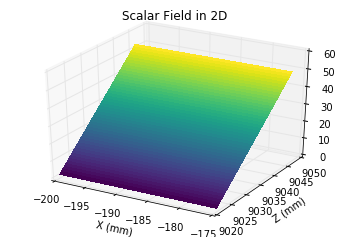

In [64]:
%matplotlib inline
fig = plt.figure().gca(projection='3d')
Xi,Zi = np.meshgrid(xs_2d, zs_2d)
fig.plot_surface(Xi,Zi,np.transpose(scalar_2d),rstride=1, cstride=1, cmap=plt.get_cmap('viridis'), linewidth=0, antialiased=False)
plt.title('Scalar Field in 2D')
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
plt.show()

Now we'll do an X-Y plane.

In [65]:
ys_2d = np.linspace(50,75,51)
vbx_func_y = np.vectorize(bx_func,excluded=['x','z'])

In [67]:
bys_edge = vby_func(x = xs_2d[0], y = ys_2d, z = 6021)
scalar_2d_xy = [bys_edge]
for x in xs_2d[1:]:
    scalar_2d_xy.append(vbx_func_y(x = x, y = ys_2d, z = 6021))
scalar_2d_xy = np.asarray(scalar_2d_xy)
scalar_2d_xy[0,:] = np.cumsum(scalar_2d_xy[0,:])
scalar_2d_xy = np.cumsum(scalar_2d_xy, axis=0)

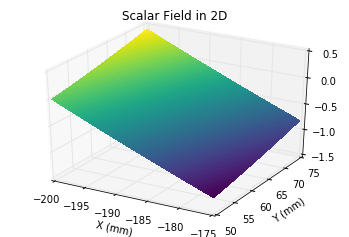

In [71]:
%matplotlib inline
fig = plt.figure().gca(projection='3d')
Xi,Yi = np.meshgrid(xs_2d, ys_2d)
fig.plot_surface(Xi,Yi,np.transpose(scalar_2d_xy),rstride=1, cstride=1, cmap=plt.get_cmap('viridis'), linewidth=0, antialiased=False)
plt.title('Scalar Field in 2D')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.show()